## Introduction to ML: Boston Housing Data

Lets download a well know ML dataset, the Boston Housing dataset to get some hands on experience with some basic yet crucial statistics. This is a [link](https://machinelearningmastery.com/standard-machine-learning-datasets/) to the dataset and below are some reference guides that people have used to analyze this dataset: 

### EDA: Data Cleaning and Preliminary Analysis

In [1]:
import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import var
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

You'll notice when you open the raw data that there are 0 columns. We'll have to impute the values for the columns in our dataframe and read it in using the `pd.read_csv` function in pandas

In [2]:
#Make our column names so we can define them in our dataset
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
           'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [3]:
#Read in our data and put in some extra things to make sure its all formatted correctly
bh = pd.read_csv('housing.data', header=None, names=columns, delim_whitespace=True)

**Meaning of Values in dataset:**

- CRIM:  per capita crime rate by town.
- ZN:    proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of nonretail business acres per town.
- CHAS:  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX:   nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per 10,000 dollars.
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT: % lower status of the population.
- MEDV: Median value of owner-occupied homes in $1000s.

**Prelim_Analysis**: Looking at the values in our data set, it looks like each observation is a essentially a town in boston and each variable is calculating porportions/averages of specific measures for each town. Our main dependent variable and target variable in this dataset will be 'MEDV' which will gives us a sense of house prices in that specific area.

In [4]:
#lets check to see if our dataset looks pretty.
bh.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
#Lets take a look at our dataset as whole. No of rows/columns ect. We should have over 500 rows and 14 columns
bh.shape

(506, 14)

In [ ]:
#checking the amount of null values we have. If we had null values we would want to convert them to 0s. We need all of our data to be in a numerical format for linear regression to work
bh.isnull().sum()

In [ ]:
#checking the cells that have null values
bh[bh.isnull().any(axis=1)]

In [ ]:
#Lets check the our data types. We would expect everything to be numerical - integer or float
bh.dtypes

In [ ]:
#Take a look at some general statistics
bh.describe()

In [7]:
#defining our features and our target variable for OLS model
X_af = bh.drop('MEDV', axis =1)
y = bh['MEDV']
X_af = sm.add_constant(X_af)

# create formula for model 1
model_1 = sm.OLS(y, X_af)
result = model_1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 25 May 2023   Prob (F-statistic):          6.72e-135
Time:                        15:54:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### Data Visualizations

Lets take a look at our target variable to understand its distribution. We'll also plot our percentiles on the graph to visualize them as well.

#### Histogram for target variable

In [ ]:
p25 = np.percentile(bh['MEDV'], 25)
p50 = np.percentile(bh['MEDV'], 50)
p75 = np.percentile(bh['MEDV'], 75)

sns.histplot(data=bh['MEDV'], kde=True, bins=30)

plt.axvline(x=p25, color='red', linestyle='--', label='25th percentile')
plt.axvline(x=p50, color='blue', linestyle='--', label='50th percentile')
plt.axvline(x=p75, color='orange', linestyle='--', label='75th percentile')
plt.legend()

We can see that our data is slightly skewed to the right, meaning we have a positively skewed distribution. This is important to note for any transformations we decide to employ down the line. Generally, we don't like to have skewness in our data. For more on that refer to this [article](https://builtin.com/data-science/skewed-data).

#### Correlation Heatmap

Now lets create a heatmap to view the correlation between MEDV and the other features in our data sets

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         
corr_matrix = bh.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

When looking at correlation heatmaps, correlation numbers higher than 0.7(absolute value) tends to mean there is a fairly strong positive correlation. Looking at our heatmap, the values that have the strongest relationship with MEDV are:
- RM: average number of rooms per dwelling
    - This has a positive relationship with MEDV, indicating that the more rooms there are, the higher the value the house tends to be. Which seems sound
- LSTAT: % lower status of the population
    - This has a negative relationship, indicating that the higher the porportion of lower status people, the higher the likelihood the prices would be lower. Also seems sound
    
These two features seem to have the most likely predictive strength for our MEDV target variable. Lets take a look at each of these variables' distrubutions and plot their values against MEDV

In [ ]:
#lets define our feautures 
features = ['LSTAT', 'RM']

#create a good size for our visual 
plt.figure(figsize=(20, 5))

#forloop to create a visual for each of our feautres
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    p25 = np.percentile(bh[col], 25)
    p50 = np.percentile(bh[col], 50)
    p75 = np.percentile(bh[col], 75)

    sns.histplot(data=bh[col], kde=True, bins=30)

    plt.axvline(x=p25, color='red', linestyle='--', label='25th percentile')
    plt.axvline(x=p50, color='blue', linestyle='--', label='50th percentile')
    plt.axvline(x=p75, color='orange', linestyle='--', label='75th percentile')
    plt.legend()

RM overall has a nice normal gaussian distribution

The LSTAT(lower status) distribution clearly has a hard positive, right skew.

In [ ]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = bh['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = bh[col]
    y = target
    plt.scatter(x,y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

We can clearly see that both variables have a fairly strong relationship with MEDV as expected. LSAT has a negative relationship while RM has a positive one

## Preliminary Model Selection and Evaluation

### Preparing our Data for the model

In [16]:
#Using numpy we're going to grab our features and put them into a data frame
X = pd.DataFrame(np.c_[bh['LSTAT'], bh['RM'],bh['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
#We isolate our target variable
Y = bh['MEDV']

### Splitting ur data into the training set and the testing sets

Next, the data will have to be split into training sets, and testing sets. The model will be trained with about 80% of the data and we'll test 20% of the data on it. We have to do this to make sure our model performs well on unseen data. To ensure we have a good model that is trained well on our data. To split the data we use train_test_split function provided by scikit-learn library. Then we'll verify the size of our training and setting sets to ensure our data is distributed correctly

In [17]:
#For our 2 feature model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [27]:
X_train.head()

,LSTAT,RM,PTRATIO
33,18.35,5.701,21.0
283,3.16,7.923,13.6
418,20.62,5.957,20.2
502,9.08,6.120,21.0
402,20.31,6.404,20.2


### Training the Model on training set

Things look good. Now lets use scikit-learn's `Linear-Regression` to train our model.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Define our model
l_model = LinearRegression()
#Lets fit our Model to our features(X) and our target(Y) to the model
l_model.fit(X_train, Y_train)

LinearRegression()

In [19]:
#Fitting our linear model to our features(2) to see what they give us as a prediction for y
Y_train_predict = l_model.predict(X_train)
#Evaluating our predicted values against the actual values to get a sense of accuracy
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
#Looking to see how much of the variation in our data our model explains
r2 = r2_score(Y_train, Y_train_predict)

print("model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

model performance for training set
--------------------------------------
RMSE is 5.303863193307931
R2 score is 0.6725214335656511


This is a fairly good baseline to start of with. Our rmse is fairly okay and our R2 explains 67% of the variation in our dataset. Now lets see how our model will perform on data it hasn't seen before. 

### Testing the model on our test set

In [20]:
#Same tests for the test set
Y_test_predict = l_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print('model evaluation for test set')
print('-----------------------------')
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

model evaluation for test set
-----------------------------
RMSE is 4.9139375347640835
R2 is 0.691587828074417


Our rmse is lower and he r2 is higher, all good signs. We have a good baseline to start of with but now we want to make our model even better, so we'll have to employ more methods to our dataset to get closer to a better model.

### Test this on our model with 13 features

In [21]:
#defining our features and our target variable for OLS model
X_af = bh.drop('MEDV', axis =1)
y = bh['MEDV']

In [22]:
#Doing the same for all features
from sklearn.model_selection import train_test_split

X_train_af, X_test_af, y_train, y_test = train_test_split(X_af, y, test_size = 0.2, random_state=5)
print(X_train_af.shape)
print(X_test_af.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [28]:
#Define our model
l_af_model = LinearRegression()
#Lets fit our Model to our features(X) and our target(Y) to the model
l_af_model.fit(X_train_af, y_train)

LinearRegression()

In [29]:
#Fitting our linear model to our features(13) to see what they give us as a prediction for y
y_train_predict = l_af_model.predict(X_train_af)
#Evaluating our predicted values against the actual values to get a sense of accuracy
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
#Looking to see how much of the variation in our data our model explains
r2 = r2_score(y_train, y_train_predict)

print("model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

model performance for training set
--------------------------------------
RMSE is 4.741000992236517
R2 score is 0.7383393920590519


In [33]:
y_test_pred = l_af_model.predict(X_test_af)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)
print('model evaluation for test set')
print('-----------------------------')
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

model evaluation for test set
-----------------------------
RMSE is 4.5682920423032
R2 is 0.7334492147453086


## Creating Better Models
- Lets Discuss Assumptions of a linear model and whether our data completely fits those [assumptions](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)
- Lets fit a [Polynomial model](https://medium.com/towards-data-science/polynomial-regression-bbe8b9d97491) to our data

Linear Regression models make a great amount of *assumptions* about our dataset. These assumptions are:
- 1. **Linearity**: assumes that the relationship between predictors and target variable is linear

- 2. **No noise**: eg. that there are no outliers in the data

- 3. **No collinearity**: if you have highly correlated predictors, it’s most likely your model will overfit

- 4. **Normal distribution**: more reliable predictions are made if the predictors and the target variable are normally distributed

- 5. **Scale**: it’s a distance-based algorithm, so preditors should be scaled — like with standard scaler

When the data does not completely fit these assumptions, some transformations are applied to our training data to give our variables a better relationship for our model.

### Logarithimic Transformations 
Lets tackle the 4th assumption of Normal distributions. Lets look at all of our variables, including our feautres and target variable to look at their distributions to check to see how skewed they are.

In [ ]:
feautures = [X_train['RM'], X_train['LSTAT']]

#create a good size for our visual 
plt.figure(figsize=(20, 5))

#forloop to create a visual for each of our feautres
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    p25 = np.percentile(X_train[col], 25)
    p50 = np.percentile(X_train[col], 50)
    p75 = np.percentile(X_train[col], 75)

    sns.histplot(data=X_train[col], kde=True, bins=30)

    plt.axvline(x=p25, color='red', linestyle='--', label='25th percentile')
    plt.axvline(x=p50, color='blue', linestyle='--', label='50th percentile')
    plt.axvline(x=p75, color='orange', linestyle='--', label='75th percentile')
    plt.legend()

In [ ]:
p25 = np.percentile(Y_train, 25)
p50 = np.percentile(Y_train, 50)
p75 = np.percentile(bh['MEDV'], 75)

sns.histplot(data=Y_train, kde=True, bins=30)

plt.axvline(x=p25, color='red', linestyle='--', label='25th percentile')
plt.axvline(x=p50, color='blue', linestyle='--', label='50th percentile')
plt.axvline(x=p75, color='orange', linestyle='--', label='75th percentile')
plt.legend()

We can see that RM has a lovely normal distribution, while our other feature LSTAT has quite a positive, right skewed distribution. When we take a look at our target variable, we can see a very similar pattern where MEDV is also slightly positively (right) skewed. There are [several ways](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45) to tackle skewed distributions, but a very popular way to tackle right skewed distributions is to perform a **log transformation**. This is where we transform our skewed data into their logarithmic forms to create a more linear relationship between all our variables. We'll do this using numpy log function

In [ ]:
#first lets check the skews of our features
print('skew for RM feature:',X_train['RM'].skew())
print('skew for LSTAT feature:',X_train['LSTAT'].skew())
print('skew for MEDV target v:',Y_train.skew())

In [ ]:
#Now lets transform our features for our one feature LSTAT and MEDV
LSTAT_log = np.log(X_train['LSTAT'])
MEDV_log = np.log(Y_train)

In [ ]:
p25 = np.percentile(MEDV_log, 25)
p50 = np.percentile(MEDV_log, 50)
p75 = np.percentile(MEDV_log, 75)

sns.histplot(data=MEDV_log, kde=True, bins=30)

plt.axvline(x=p25, color='red', linestyle='--', label='25th percentile')
plt.axvline(x=p50, color='blue', linestyle='--', label='50th percentile')
plt.axvline(x=p75, color='orange', linestyle='--', label='75th percentile')
plt.legend()

In [ ]:
p25 = np.percentile(LSTAT_log, 25)
p50 = np.percentile(LSTAT_log, 50)
p75 = np.percentile(LSTAT_log, 75)

sns.histplot(data=LSTAT_log, kde=True, bins=30)

plt.axvline(x=p25, color='red', linestyle='--', label='25th percentile')
plt.axvline(x=p50, color='blue', linestyle='--', label='50th percentile')
plt.axvline(x=p75, color='orange', linestyle='--', label='75th percentile')
plt.legend()

In [ ]:
#first lets check the skews of our features
print('skew for LSTAT_log feature:',LSTAT_log.skew())
print('skew for MEDV_log target v:',MEDV_log.skew())

Visually it looks as though our MEDV variable has simply been flipped and is now left skewed instead of right skewed. oUr LSTAT feature seems to be in a similar shape. When we take a look at the numerical skew, we notice that our LSTAT variables skew got slightly better, while our MEDV skew seems to have gotten better as well. Despite being negatively skewed now, its skew has decreased from 1.1 which was very skewed to -0.34, which is a better skew. How will these variables perform on our model now? Lets check.

In [ ]:
RM = X_train['RM']
LSTAT_log = LSTAT_log

X_train_log = pd.DataFrame({'LSTAT': LSTAT_log, 'RM': RM})

Y_train_log = pd.DataFrame({'MEDV': MEDV_log})

In [ ]:
print(X_train_log.shape)
print(Y_train_log.shape)

In [ ]:
#Define our model
llog_model = LinearRegression()
#Lets fit our Model to our features(X) and our target(Y) to the model
llog_model.fit(X_train_log, Y_train_log)

In [ ]:
#Fitting our linear model to our features to see what they give us as a prediction for y
ylog_train_predict = llog_model.predict(X_train_log)
#Evaluating our predicted values against the actual values to get a sense of accuracy
logrmse = (np.sqrt(mean_squared_error(Y_train_log, ylog_train_predict)))
#Looking to see how much of the variation in our data our model explains
logr2 = r2_score(Y_train_log, ylog_train_predict)

print("model performance for log training set")
print("--------------------------------------")
print('log RMSE is {}'.format(rmse))
print('log R2 score is {}'.format(r2))

This model did a lot better than our previous training set with no log transformations. Lets see how this model now performs on our testing set. We'll also have to transorm our test values to log values as well in the same way

In [ ]:
LSTAT_log_test = np.log(X_test['LSTAT'])
MEDV_log_test = np.log(Y_test)
RM_test = X_test['RM']

X_test_log = pd.DataFrame({'LSTAT': LSTAT_log_test, 'RM': RM_test})

Y_test_log = pd.DataFrame({'MEDV': MEDV_log_test})

In [ ]:
#Same tests for the test set
y_testlog_predict = llog_model.predict(X_test_log)
log_testrmse = (np.sqrt(mean_squared_error(Y_test_log, y_testlog_predict)))
log_testr2 = r2_score(Y_test_log, y_testlog_predict)

print('log model evaluation for test set')
print('-----------------------------')
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

Our log transformations proved useful for our training set and gave us some increases in the R2 score meaning that our model understands our data better and a lower RMSE meaning our error rate is a little lower as well. Now lets take a look at some of our other assumptions to see if we can also make some gains in other areas. 

### Polynomial Regression

Previously we tried to create a more linear relationship by trying to transform our data into more normal distributions with logarithmic transformations. Yet there are other ways to deal with non linear distributions. Another way is to fit the model on a [Polynomial regression](https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/). These types of regressions deal with variables that look to have a slight curve when plotted against the target variable instead of a straight line. We can see that our variable LSTAT has a slight curve as compared to RM, indicating that maybe a Polynomial Regression would be a good fit for it. 

In [ ]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = bh['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = bh[col]
    y = target
    plt.scatter(x,y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Before we explore how this type of model can be used to fit our data, lets generate a random data set to understand it better

Lets apply a linear regression model to a data set we will generate using numpy and the scikit learn library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#create our nonlinear data points
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

#tranform our data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#lets fit our data onto a linear regression model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

#lets plot our data and also plot our line of best fit for our linear regression
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [ ]:
#Fitting our linear model to our features to see what they give us as a prediction for y
y_pred = model.predict(x)
#Evaluating our predicted values against the actual values to get a sense of accuracy
rmse = (np.sqrt(mean_squared_error(y, y_pred)))
#Looking to see how much of the variation in our data our model explains
r2 = r2_score(y, y_pred)

print("model performance")
print("------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

### Under-Fitting and Over-Fitting

We can see that our line of best fit clearly is not doing the job right and isn't able to capture the pattern of our data set at all. This is an **Under-Fitting**. Under-Fitting is something we want to circumvent when building our models and to do that we have to increase the *complexity* of our model. 

We'll essentially have to generate a higher order of equations. Our current equation looks like 
    Y = B0 + B1x
But what we want instead is"
    Y = B0 + B1x + B2x^2

This is still a linear model because the coefficients we currently have are still linear. x^2 is just an additional feature, but including it has indicated to our model that the curve we are fitting is [quadratic](https://en.wikipedia.org/wiki/Quadratic_function) in nature

To add and convert our current features to best fit our model, we will use the `PolynomialFeatures` class in scikit-learn. To account for our new feature of x^2 we'll have to use the [degree](https://www.investopedia.com/terms/d/degrees-of-freedom.asp#:~:text=Degrees%20of%20Freedom%20Formula&text=Some%20calculations%20of%20degrees%20of,are%20two%20parameters%20to%20estimate.) parameter. 

In [ ]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#add in the total no of degrees in our equation
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#Build our model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#evaluate our metrics
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

#create our scatter plot-you have to create this after evaluating your metrics or it'll skew the data a bit
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

We can see that our RMSE has decreased by about 5 points meaning our error term is lower, a good sign. We can also see that our our r2 is higher as well and has increased by over 22%. This indicates that our model is getting better! Now lets try fitting a [cubic curve](https://en.wikipedia.org/wiki/Cubic_function) to our data to see how it impacts our data.

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#add in the total no of degrees in our equation
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

#Build our model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#evaluate our metrics
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

#create our scatter plot-you have to create this after evaluating your metrics or it'll skew the data a bit
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

We've now gotten a much lower error score, decreasing it by 7 points and our r2 has increased by 13%, and is now very close 100%. Looking at this, it looks like our cubic curve fits our data very well and has optimized our model greatly. We can go even further and increase our degrees to 20. Lets do that to see how well it fits to our data and impacts our model.

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#add in the total no of degrees in our equation
polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

#Build our model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#evaluate our metrics
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

#create our scatter plot-you have to create this after evaluating your metrics or it'll skew the data a bit
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

Our error term has decreased by 2 points, and our r2 has increased by about 1% point. Overall though it looks like this is an extremely optimal fit for our data, we don't really benefit much from having that marginal positive increase in metrics. Furthermore, this curve is also capturing a lot of the outliers and noise in our data, which is perfect for this specific set of data we have, but is extremely sub optimal for future data we decide to use this model for, future unseen data. This is an example of **over-fitting**.

To correct this, we can add more training samples so the algorithm we have doesn't learn the noise in our data, but really and truly we have to learn how to choose optimal models. But how do we do that? 

### Bias vs Variance trade - off

What we have just proved with our previous work is the *bias variance trade-off*. Bias refers to the error due to our models very simple assumptions in fitting the data. A high bias means the model can't understand our data patterns. It is biased towards its basic assumptions which results in **under-fitting**. Variance refers to the error due to the complex model trying to fit the data too well. High variance means the models path is highly variable, and has the ability to fit almost every data point which results in **over-fitting**. Lets visualize all our previous models and put them side by side to really see what this looks like. 

In [ ]:
degrees = [1, 3, 20]

fig, axs = plt.subplots(1, len(degrees), figsize=(15, 5))

titles = ['High Bias, Low Variance', 'Low Bias, Low Variance', 'Low Bias, High Variance']

for i, degree in enumerate(degrees):
    np.random.seed(0)
    x = 2 - 3 * np.random.normal(0, 1, 20)
    y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
    
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)
    
    axs[i].scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    axs[i].plot(x, y_poly_pred, color='m')
    
    axs[i].set_title(titles[i]) 
    axs[i].text(0.05, 0.95, f'Degree: {degree}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}', 
                transform=axs[i].transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

We can clearly see that as our model complexity increases, its bias decreases but its variability shoots up as well. To achieve a good model that performs well both on the training set and unseen data, we'll have to make a trade-off. In this case, the optimal model would be our second model. Though its variance is higher than our first, its bias is lower than our third, and its metrics are still quite optimal. 

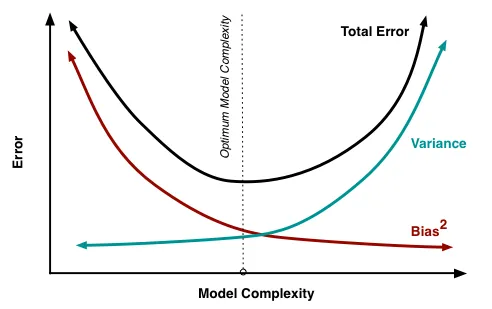

### Applying Polynomial Regression to Our Boston Housing Dataset

As mentioned before, our Boston Housing data set doesn't have completely linear values. Our LSTAT value in particular has a slighly more complex pattern than a simple linear one. 

In [ ]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = bh['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = bh[col]
    y = target
    plt.scatter(x,y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

We've dealt with creating polynomial features with a univariate model, but how do we implement it when we have multivariate one. Lets create a function which will transform the original features into polynomial features and then apply the linear regression on it. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def poly_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features in our training set to higher degree features
    X_train_poly = poly_features.fit_transform(X_train)
    
    #fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
    
    #lets predict now on training dataset
    y_train_predicted = poly_model.predict(X_train_poly)
    
    #predicting on test dataset
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    
    #get evaluation metrics for training data
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predict))
    r2_train = r2_score(Y_train, y_train_predict)
    
    #get evaluation metrics for testing 
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
  
    print("\n")
  
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [ ]:
poly_model(2)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_test_predict, color = 'g')
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

https://builtin.com/machine-learning/ensemble-model